In [1]:
%load_ext ipydex.displaytools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/brandonhosley/Documents/GitHub/Schoolwork/2023Q2 - Statistical Machine Learning/Project')
import ProjectFunctions as PF

In [2]:
df = pd.read_csv('../../Datasets/diabetes_data.csv')
df.head()

label = 'Diabetes'
fields=['Rho','Imbalance Technique','Classifier','Training f1','Test f1',
        'Runtime','Minority Count','k','n-Estimators','MaxDepth','MaxFeatures']

df = PF.scrub_diabetes(df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [7]:
filename = 'UndersamplingTechniques.csv'
#### PF.newFile(filename, fields)

#PF.baseline
# PF.Undersample, PF.OneSided,PF.Near_Miss, PF.Tomek_Links
#PF.Oversample, PF.smote,  PF.borderline_smote

for tech in [PF.Near_Miss]:  
    for classifier in [PF.KNN, PF.DecisionTree ]: # , PF.ExtraTrees, PF.RandomForest , , 
        for _ in range(10):
            for i in list(range(3,10,2))+list(range(10,99,10))+list(range(100,501,25)):
                PF.test(df, i, tech, classifier, fields, filename=filename)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*arg

ValueError: n_splits=5 cannot be greater than the number of members in each class.

Visualizing the Undersampling

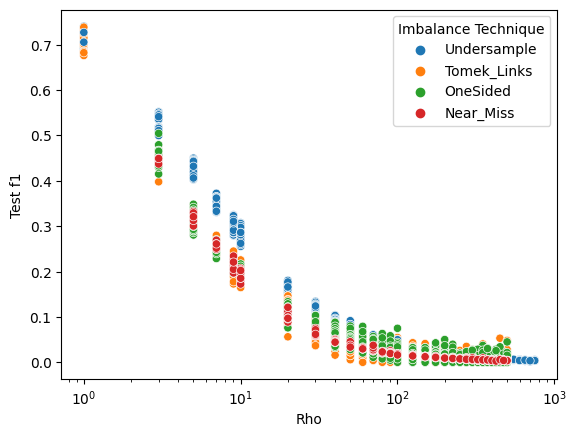

In [11]:
tr = pd.read_csv('UndersamplingTechniques.csv')

sns.scatterplot(x='Rho',y='Test f1', hue='Imbalance Technique', data=tr)
plt.xscale('log')

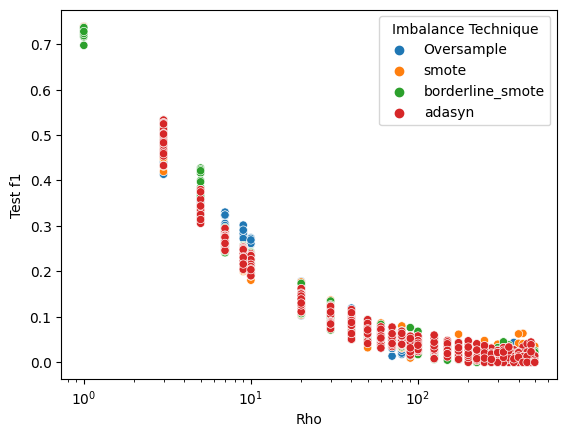

In [5]:
tr = pd.read_csv('OversamplingTechniques.csv')

sns.scatterplot(x='Rho',y='Test f1', hue='Imbalance Technique', data=tr)
plt.xscale('log')